# Balloons

Calculating Gini, Entropy, and Information Gain

## Methods Used to Split the Tree

The idea behind building trees is, finding the best feature to split on that generates the largest information gain or provides the least uncertainity in the following leafs.

https://www.kaggle.com/code/ma7555/decision-trees-information-gain-from-scratch

Information gain is a decrease in entropy. Decision trees make use of information gain and entropy to determine which feature to split into nodes to get closer to predicting the target and also to determine when to stop splitting.

https://www.askpython.com/python/examples/decision-trees

https://www.analyticsvidhya.com/blog/2020/06/4-ways-split-decision-tree/

* Reduction in Variance
* Gini Impurity
* Entropy
* Information Gain
* Chi Square: See Week 11 - Chi Square

## Balloon Data

In [ ]:
# https://archive.ics.uci.edu/ml/datasets/balloons
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

df = pd.read_csv('https://raw.githubusercontent.com/gitmystuff/Datasets/main/yellow-small%2Badult-stretch.data')
df.columns = ['Color', 'size', 'act', 'age', 'inflated']
print(df.head())

# Using LabelEncoder is good here: labels don't exceed 2 unique values and trees
# are ok with ordinal values because
# the magnitude of the number is not a factor
le = LabelEncoder()
le_df = df.copy()
for feat in le_df.columns:
    le_df[feat] = le.fit_transform(le_df[feat])

X = le_df.drop('inflated', axis=1)
y = le_df['inflated']

print('\nLabel Encoder')
print('\nX')
print(X.head())
print('\ny')
print(y.head())


    Color   size      act    age inflated
0  YELLOW  SMALL  STRETCH  CHILD        T
1  YELLOW  SMALL      DIP  ADULT        T
2  YELLOW  SMALL      DIP  CHILD        T
3  YELLOW  LARGE  STRETCH  ADULT        T
4  YELLOW  LARGE  STRETCH  CHILD        F

Label Encoder

X
   Color  size  act  age
0      1     1    1    1
1      1     1    0    0
2      1     1    0    1
3      1     0    1    0
4      1     0    1    1

y
0    1
1    1
2    1
3    1
4    0
Name: inflated, dtype: int32


## Gini

* Probability of a specific feature that is classified incorrectly when selected randomly
* The more diverse the higher the gini impurity index
* Gini index = probability of picking two distinct elements
* Gini = 0, purity of classification
* Gini = 1, random distribution
* Gini = .5, equal distribution of elements
* Favors larger partitions and easy to implement

In [ ]:
balloons = X.copy()
balloons['inflated'] = y.copy()
print(balloons.head())

   Color  size  act  age  inflated
0      1     1    1    1         1
1      1     1    0    0         1
2      1     1    0    1         1
3      1     0    1    0         1
4      1     0    1    1         0


In [ ]:
print(balloons.groupby('inflated')['Color'].count())
print(balloons.groupby('inflated')['Color'].apply(lambda x: (x==0).count()).reset_index(name='count'))

inflated
0    9
1    6
Name: Color, dtype: int64
   inflated  count
0         0      9
1         1      6


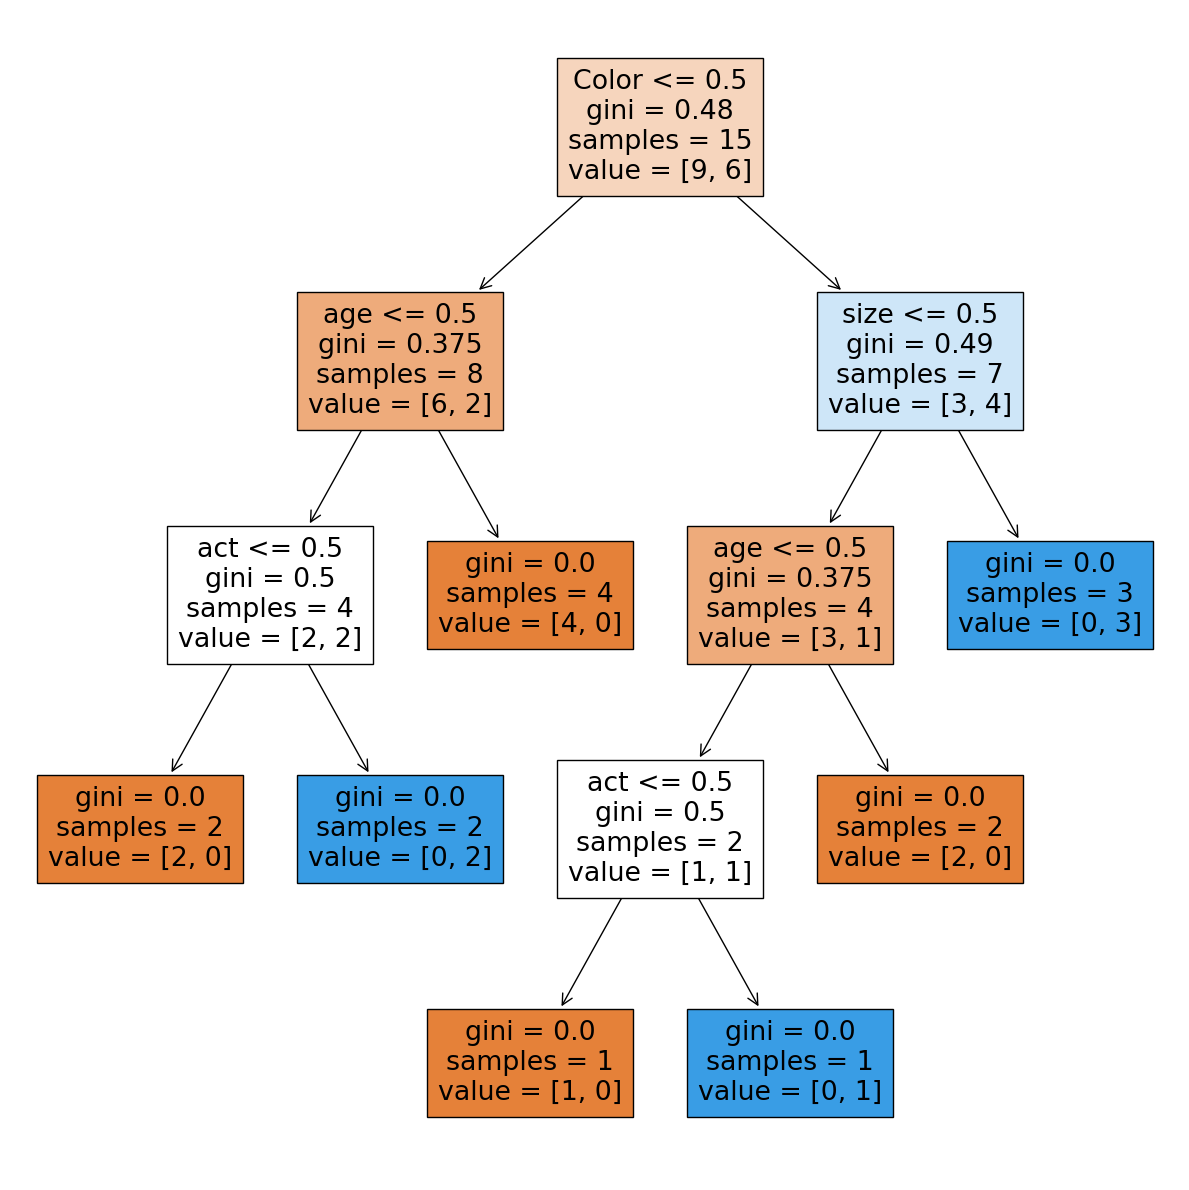

In [ ]:
model = DecisionTreeClassifier(criterion='gini', random_state=42).fit(X, y)

plt.figure(figsize=(12, 12))
tree.plot_tree(model,
              feature_names=X.columns,
              class_names='10',
              filled=True);

plt.tight_layout();

## Gini Impurity

Gini Impurity = 1 - Gini

## Gini Formula

### $\sum{p_i^2}$

In [ ]:
# inflated counts
df['inflated'].value_counts()

F    9
T    6
Name: inflated, dtype: int64

In [ ]:
# apply gini formula
import numpy as np

f = 9 / 15
t = 6 / 15
print(1-((f**2)+(t**2)))

0.48


In [ ]:
# another calculation
1 - sum(df['inflated'].value_counts(normalize=True)**2)

0.48

In [ ]:
df.groupby(['Color', 'inflated'])['inflated'].count()

Color   inflated
PURPLE  F           6
        T           2
YELLOW  F           3
        T           4
Name: inflated, dtype: int64

In [ ]:
import numpy as np

f = 6 / 8
t = 2 / 8
print(1-((f**2)+(t**2)))

0.375


In [ ]:
import numpy as np

f = 3 / 7
t = 4 / 7
print(1-((f**2)+(t**2)))

0.48979591836734704


## Entropy

* Measures uncertainty in a dataset
* Measures disorder
* Count the number of unique labels in a feature
* $entropy= -p_1log(p_1)-p_2log(p_2)...$
* $p_i$ = 1, all members have property i
* $p_i$ = 0, no members have property i
* For two classes q = 1 - p
* q = 0, one class is dominant, set has minimal disorder (it is pure) and the entropy is zero
* q = p = 0.5, set is balanced and entropy is 1
* q = 1, other class is dominant and entropy is back to zero

https://book.akij.net/eBooks/2018/May/5aef50939a868/Data_Science_for_Bus.pdf (page 51 - 52)

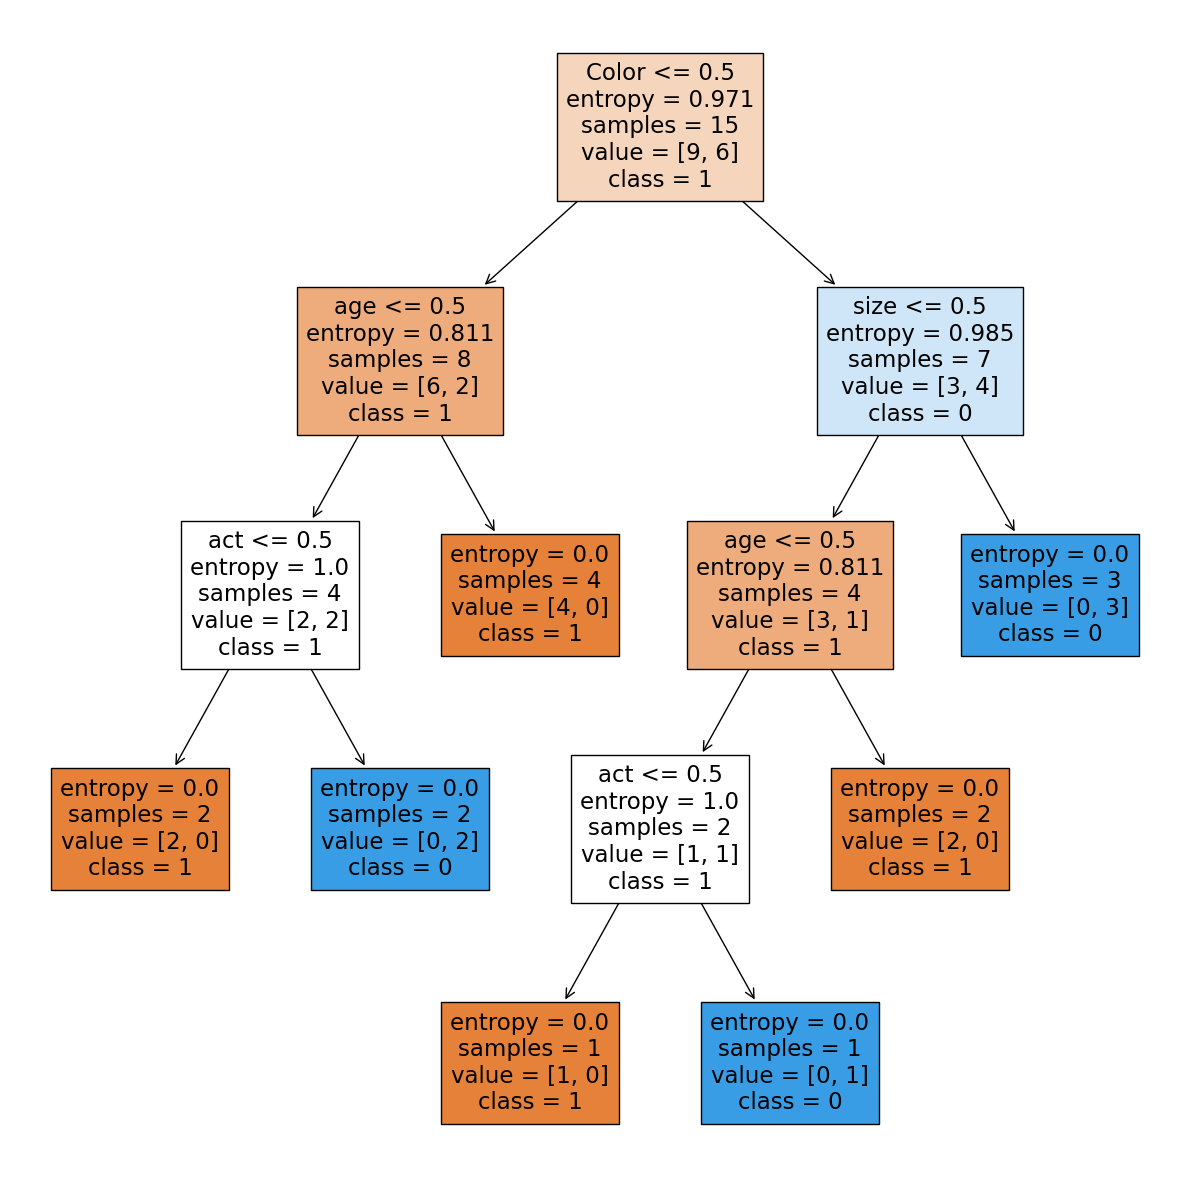

In [ ]:
model = DecisionTreeClassifier(criterion='entropy', random_state=42).fit(X, y)

plt.figure(figsize=(12, 12))
tree.plot_tree(model,
              feature_names=X.columns,
              class_names='10',
              filled=True);

plt.tight_layout();

## Entropy Formula

### $-\sum{p(x)log_2p(x)}$

In [ ]:
# inflated counts
df['inflated'].value_counts()

F    9
T    6
Name: inflated, dtype: int64

* for F 9 / 15
* for T 6 / 15

In [ ]:
# apply entropy formula
import numpy as np

f = 9 / 15
t = 6 / 15
print(-((f * np.log2(f))+(t * np.log2(t))))

0.9709505944546686


Entropy ≈ 0.97 bits, which is close to the maximum of 1 bit for two classes. This indicates a high level of disorder / low purity.

I.e., entropy is about 97% maximum possible entropy, a high level of disorder and low level of purity

## Information Gain

We can define information gain as a measure of how much information a feature provides about a class. Information gain helps to determine the order of attributes in the nodes of a decision tree.

https://www.section.io/engineering-education/entropy-information-gain-machine-learning/

Information Gain = 1 - Entropy

* Measures how much information X provides for y
* Binary measure, either 1 or 0
* 1 for full bit of information
* 0 for no information
* Entropy is also information
* Our entropy example for the `target (inflated)` shows less than a bit of information because there are more Fs than Ts
* If we predict F we have a 9 out of 15 chance of being right

We can also think of entropy as information. Suppose we have a loaded six-sided die which always lands on (3). Each time we roll the die, we know upfront that the result will be (3). We gain no new information by rolling the die, so entropy is 0. On the other hand, if the die is fair and we roll a (3) there is a 1/6 chance in rolling the (3). Now we have gained information. Thus, rolling the die gives us one bit of information — which side the number landed on.

https://towardsdatascience.com/entropy-and-information-gain-in-decision-trees-c7db67a3a293

### Gain Ratio

* Makes decision on what to split first
* https://www.kdnuggets.com/2020/01/decision-tree-algorithm-explained.html

* Keep on splitting till our target value, inflated, is no longer mixed or pure
* We want splits that lower the entropy of our target column

In [ ]:
df.groupby(['Color', 'inflated'])['inflated'].count()

Color   inflated
PURPLE  F           6
        T           2
YELLOW  F           3
        T           4
Name: inflated, dtype: int64

* Look at the entropy on both sides of the split

In [ ]:
# left split
import numpy as np

f = 6 / 8
t = 2 / 8
print(-((f * np.log2(f))+(t * np.log2(t))))

0.8112781244591328


* Entropy on the left split is lower than the right side

In [ ]:
# right split
import numpy as np

f = 3 / 7
t = 4 / 7
print(-((f * np.log2(f))+(t * np.log2(t))))

0.9852281360342515


* We see the proportions of our two colors, yellow and purple, on y, inflated or not inflated
* Color gives us a little more information on y, information gained

### $IG(Y,X) = Entropy{(Y)}-Entropy{(Y|X)}$

How much information is gained about y, when we learn about y given X, a particular feature

* where Y = Target (inflated)
* and Y|X is class of Y given the feature

In [ ]:
df['Color'].value_counts()

PURPLE    8
YELLOW    7
Name: Color, dtype: int64

In [ ]:
# information gain on size
from collections import Counter

f = 9 / 15
t = 6 / 15
EY = -((f * np.log2(f))+(t * np.log2(t)))

split_values = df.groupby(['Color', 'inflated'])['inflated'].count().values

split_left1 = split_values[0] / (split_values[0] + split_values[1])
split_left2 = split_values[1] / (split_values[0] + split_values[1])
split_right1 = split_values[2] / (split_values[2] + split_values[3])
split_right2 = split_values[3] / (split_values[2] + split_values[3])

Class0 = -(((split_left1) * np.log2(split_left1))+((split_left2) * np.log2(split_left2)))
Class1 = -(((split_right1) * np.log2(split_right1))+((split_right2) * np.log2(split_right2)))

c0 = 8 / 15
c1 = 7 / 15

print('Entropy(Y):', EY)
print('Left Side:', Class0)
print('Right Side:', Class1)

EYX = (Class0 * c0) + (Class1 * c1)
print('IG(Y, X):', EY - EYX)

Entropy(Y): 0.9709505944546686
Left Side: 0.8112781244591328
Right Side: 0.9852281360342515
IG(Y, X): 0.078495797927147


* Our goal is to lower entropy
* We want to do the initial split with the feature that has the highest information gain
* Information gain for `Color` is low but it is positive, information gain
* The entropy on the left side is lower than the initial target entropy (`inflated`)
* The lower the entropy on both sides, the greater the information gain

https://www.section.io/engineering-education/entropy-information-gain-machine-learning/

## Gini vs Entropy?

* https://www.kdnuggets.com/2020/01/decision-tree-algorithm-explained.html
* The Gini Impurity favours bigger partitions (distributions) and is simple to implement, whereas information gains favour smaller partitions (distributions) with a variety of diverse values, necessitating a data and splitting criterion experiment
* https://analyticsindiamag.com/gini-impurity-vs-information-gain-vs-chi-square-methods-for-decision-tree-split/
* Gini Index has values inside the interval (0, 0.5) whereas the interval of the Entropy is (0, 1). In the following figure, both of them are represented. The gini index has also been represented multiplied by two to see concretely the differences between them, which are not very significant.
* https://quantdare.com/decision-trees-gini-vs-entropy/

## Feature with Highest Information Gain

### Entropy Formula

### $-\sum{p(x)log_2p(x)}$

### $IG(Y,X) = Entropy{(Y)}-Entropy{(Y|X)}$

How much information is gained about y, when we learn about y given X, a particular feature

* where Y = Target (inflated)
* and Y|X is class of Y given the feature

### Gini Impurity

Gini Impurity = 1 - Gini

### Gini Formula

### $\sum{p_i^2}$

In [ ]:
def compute_impurity(feature, impurity_criterion):
    """
    This function calculates impurity of a feature.
    Supported impurity criteria: 'entropy', 'gini'
    input: feature (this needs to be a Pandas series)
    output: feature impurity
    """
    probs = feature.value_counts(normalize=True)

    if impurity_criterion == 'entropy':
        impurity = -1 * np.sum(np.log2(probs) * probs)
    elif impurity_criterion == 'gini':
        impurity = 1 - np.sum(np.square(probs))
    else:
        raise ValueError('Unknown impurity criterion')

    return(round(impurity, 3))

def comp_feature_information_gain(df, target, descriptive_feature, split_criterion):
    """
    This function calculates information gain for splitting on
    a particular descriptive feature for a given dataset
    and a given impurity criteria.
    Supported split criterion: 'entropy', 'gini'
    """

    print('target feature:', target)
    print('descriptive_feature:', descriptive_feature)
    print('split criterion:', split_criterion)

    target_entropy = compute_impurity(df[target], split_criterion)

    # we define two lists below:
    # entropy_list to store the entropy of each partition
    # weight_list to store the relative number of observations in each partition
    entropy_list = list()
    weight_list = list()

    # loop over each level of the descriptive feature
    # to partition the dataset with respect to that level
    # and compute the entropy and the weight of the level's partition
    for level in df[descriptive_feature].unique():
        df_feature_level = df[df[descriptive_feature] == level]
        entropy_level = compute_impurity(df_feature_level[target], split_criterion)
        entropy_list.append(round(entropy_level, 3))
        weight_level = len(df_feature_level) / len(df)
        weight_list.append(round(weight_level, 3))

    # print('impurity of partitions:', entropy_list)
    # print('weights of partitions:', weight_list)

    feature_remaining_impurity = np.sum(np.array(entropy_list) * np.array(weight_list))
    # print('remaining impurity:', feature_remaining_impurity)

    information_gain = target_entropy - feature_remaining_impurity
    print('information gain:', information_gain)

    print('====================')

    return(information_gain)

# https://www.featureranking.com/tutorials/machine-learning-tutorials/information-gain-computation/

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

iris = load_iris()
X = iris.data
y = iris.target

df = pd.DataFrame(data=X, columns=iris.feature_names)
df['species'] = y
df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})


df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
import numpy as np

split_criterion = 'entropy'
for feature in df.drop(columns='species').columns:
    feature_info_gain = comp_feature_information_gain(df, 'species', feature, split_criterion)

target feature: species
descriptive_feature: sepal length (cm)
split criterion: entropy
information gain: 0.8758720000000001
target feature: species
descriptive_feature: sepal width (cm)
split criterion: entropy
information gain: 0.517269
target feature: species
descriptive_feature: petal length (cm)
split criterion: entropy
information gain: 1.446396
target feature: species
descriptive_feature: petal width (cm)
split criterion: entropy
information gain: 1.436151


    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
22                4.6               3.6                1.0               0.2
15                5.7               4.4                1.5               0.4
65                6.7               3.1                4.4               1.4
11                4.8               3.4                1.6               0.2
42                4.4               3.2                1.3               0.2


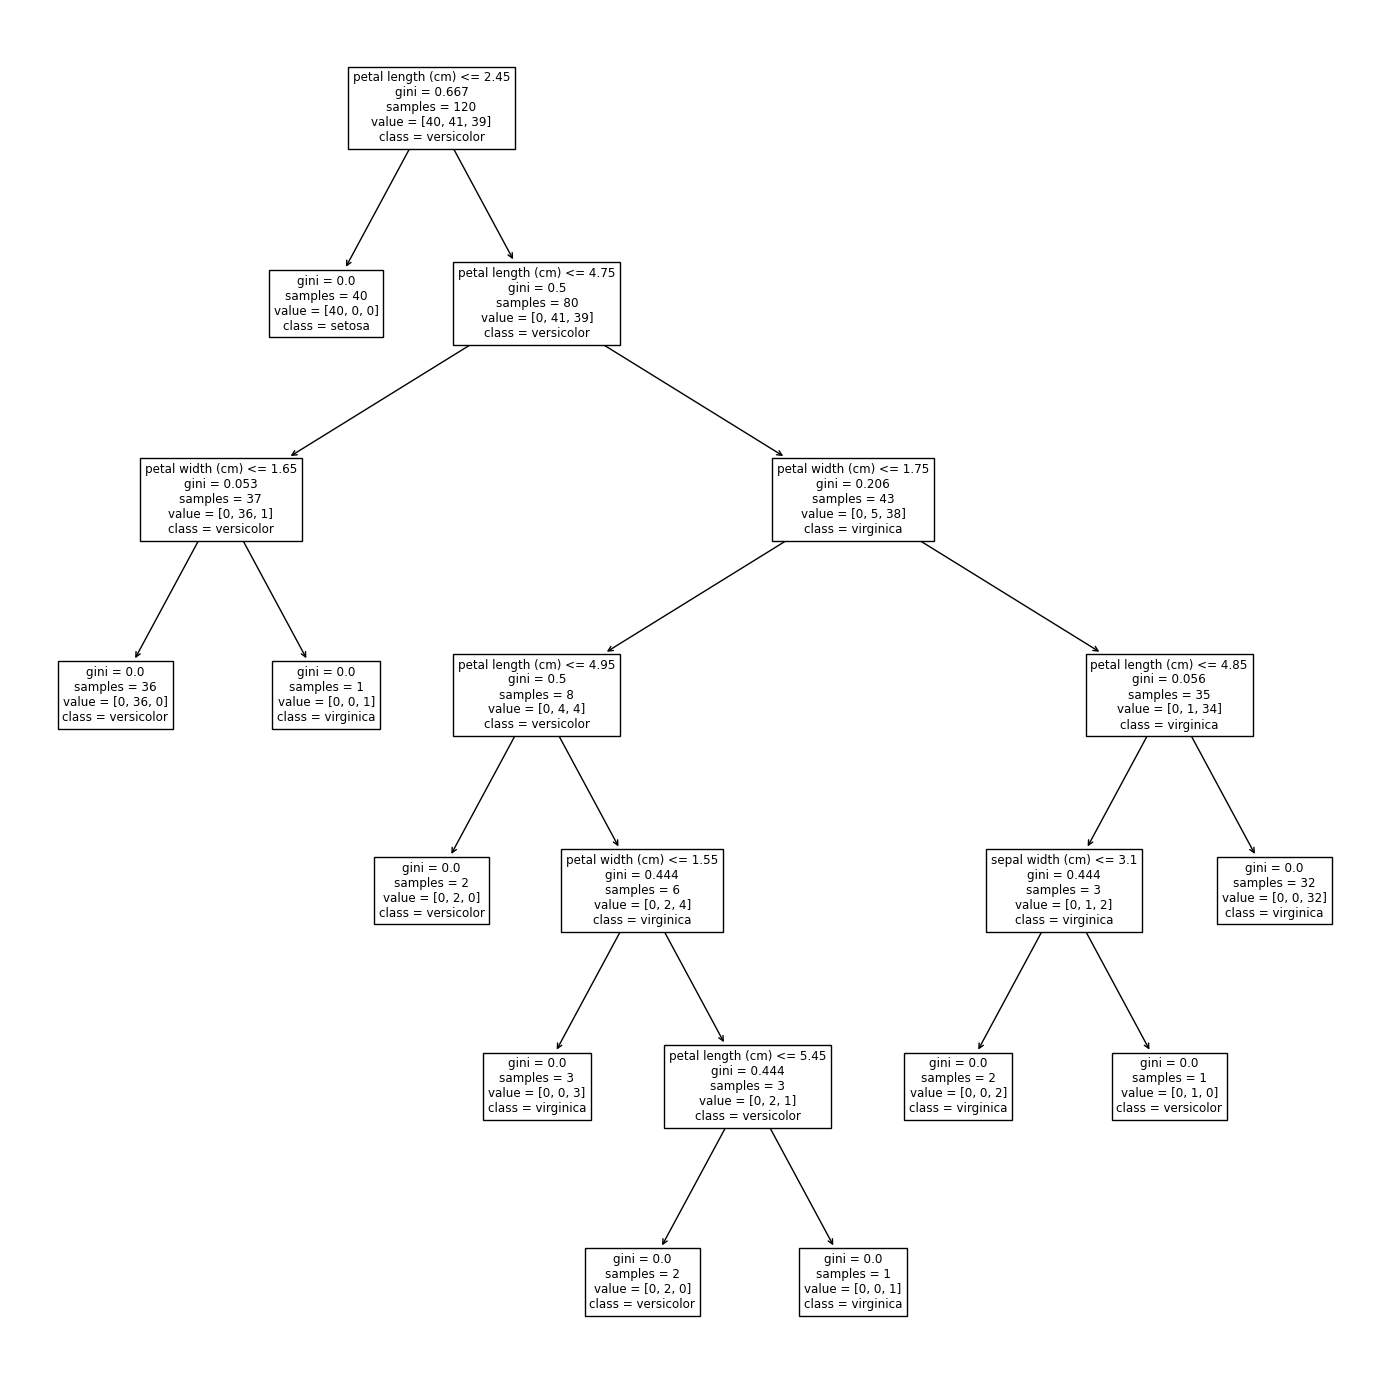

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split

print(X_train.head())

model = DecisionTreeClassifier(criterion='gini', random_state=42).fit(X_train, y_train)

plt.figure(figsize=(14, 14))
tree.plot_tree(model,
              feature_names=X_train.columns,
              class_names=['setosa', 'versicolor', 'virginica'],
              filled=False)

plt.tight_layout();

In [ ]:
split_criteria = 'gini'
for feature in df.drop(columns='species').columns:
    feature_info_gain = comp_feature_information_gain(df, 'species', feature, split_criteria)

target feature: species
descriptive_feature: sepal length (cm)
split criterion: gini
information gain: 0.347094
target feature: species
descriptive_feature: sepal width (cm)
split criterion: gini
information gain: 0.199623
target feature: species
descriptive_feature: petal length (cm)
split criterion: gini
information gain: 0.604321
target feature: species
descriptive_feature: petal width (cm)
split criterion: gini
information gain: 0.604288
